✅ Dataset loaded successfully!
Shape of dataset: (1310, 14)
   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

  

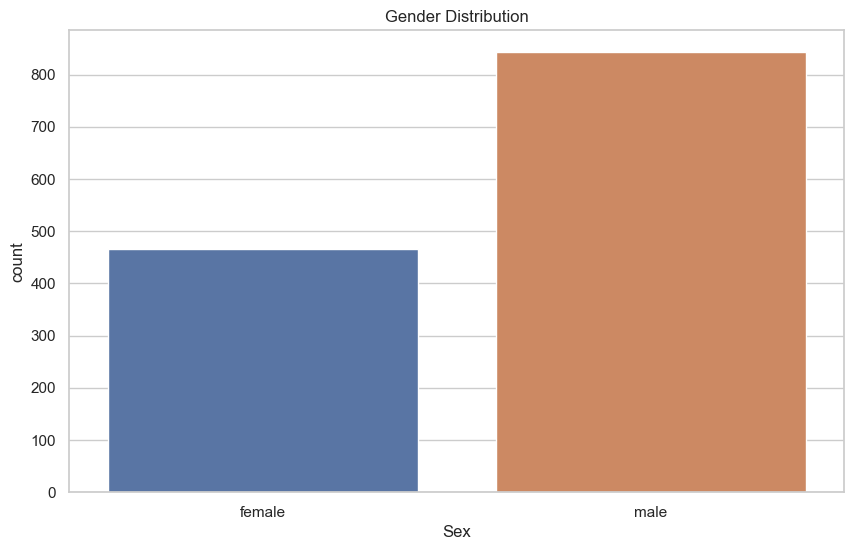

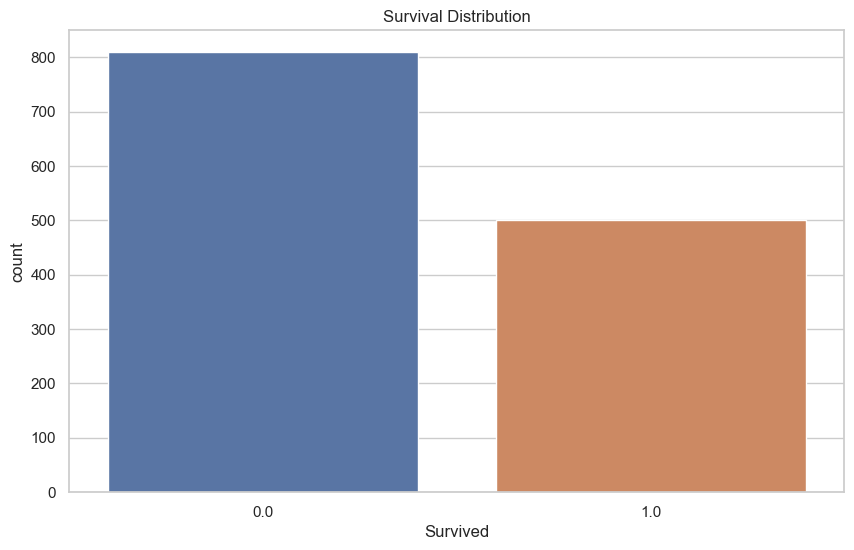

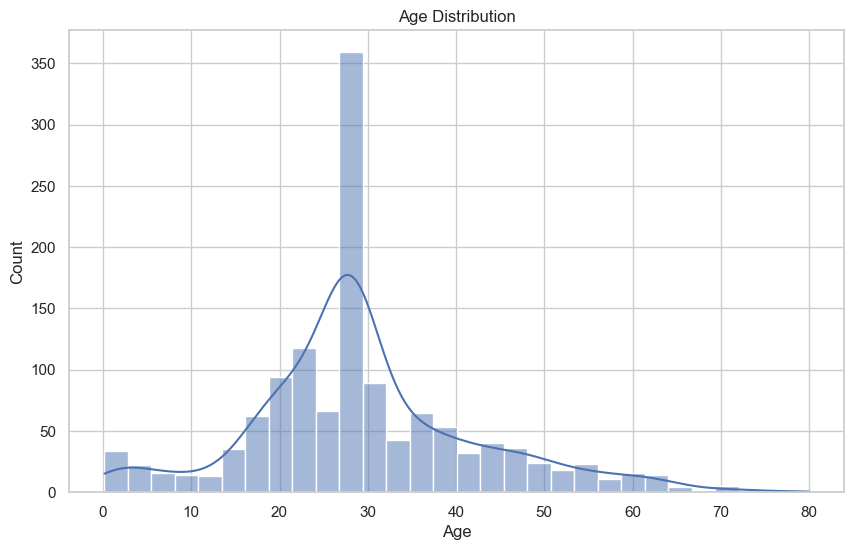

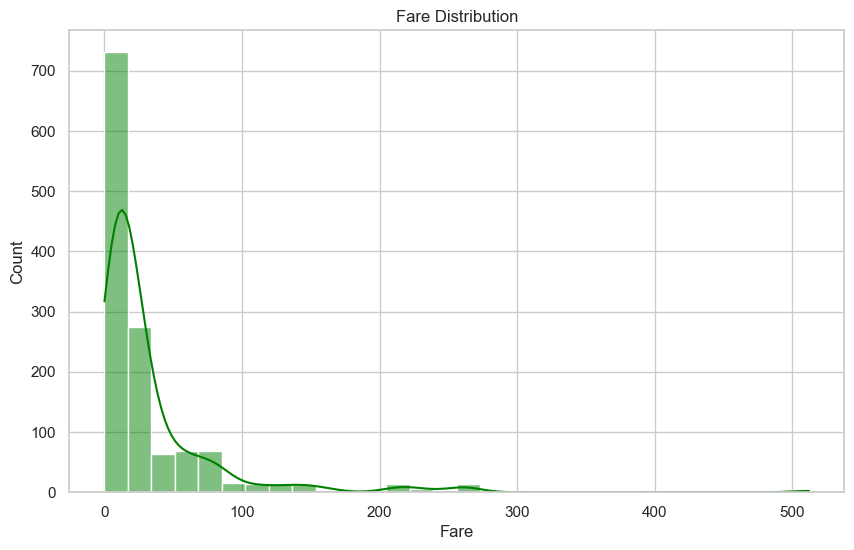

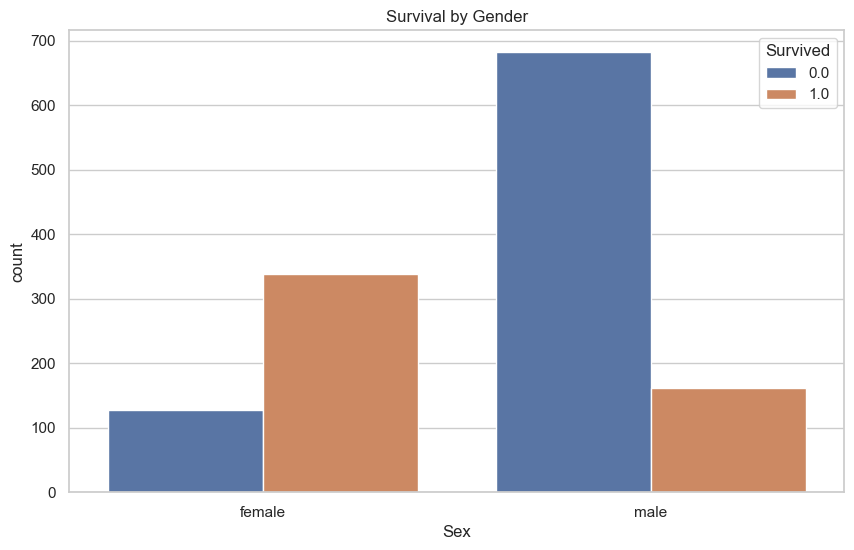

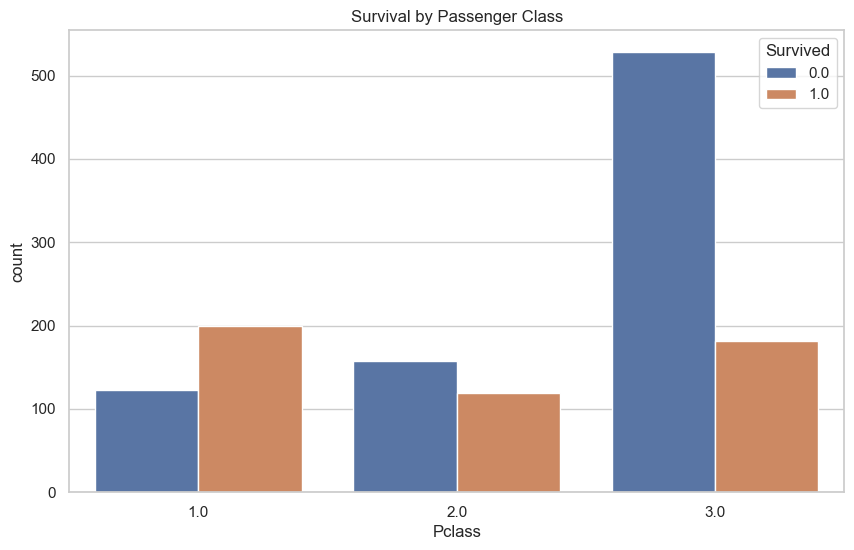

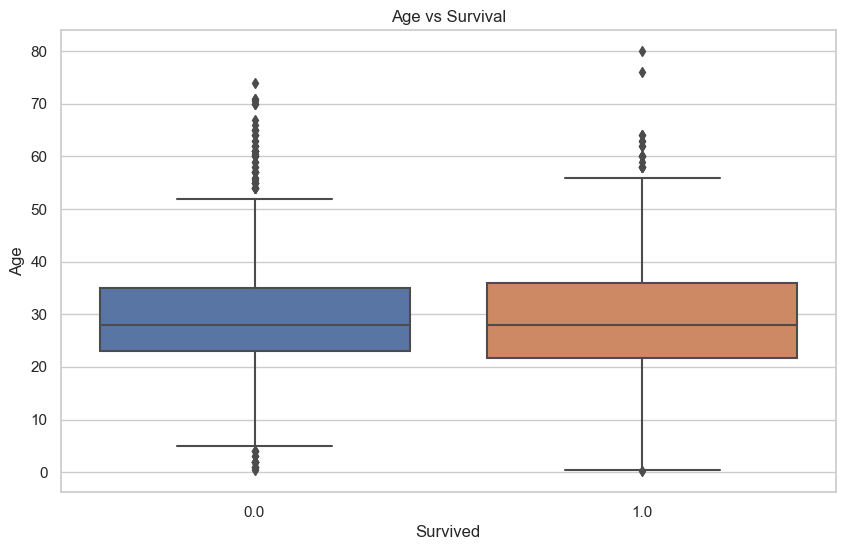

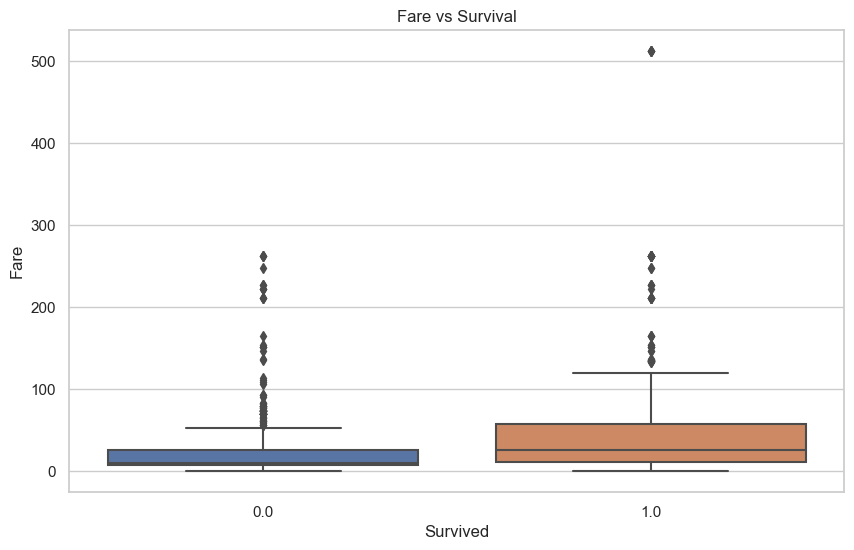

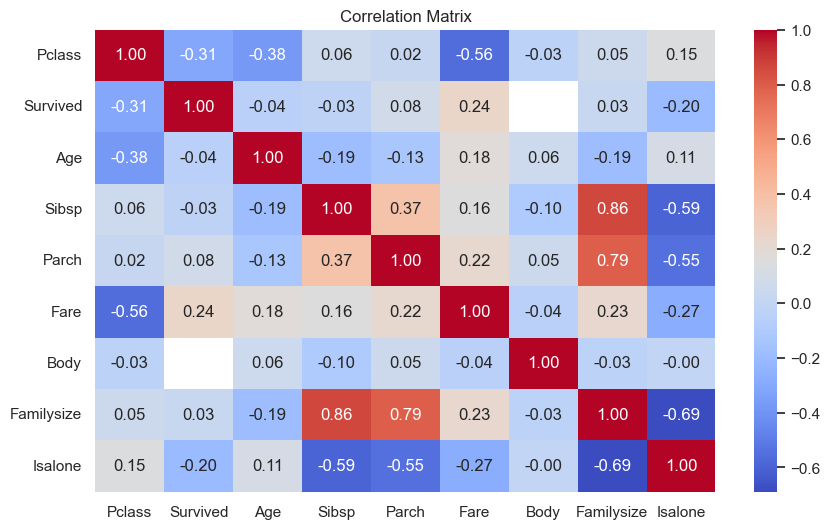


✅ SUMMARY OF FINDINGS:

1. More females survived than males.
2. Passengers in 1st class had higher survival rates.
3. Younger passengers had slightly better chances of survival.
4. Higher fares were linked to higher survival probability.
5. Passengers traveling alone had lower survival rates.


✅ Cleaned dataset saved as 'titanic_cleaned.csv'


In [4]:
# TASK 5: Exploratory Data Analysis - Titanic Dataset

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup display settings
pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# Step 2: Load the Dataset
# Make sure the Titanic dataset (train.csv) is in the same folder
df = pd.read_csv('train.csv')
print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print(df.head())

# Step 3: Basic Information
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
print(df.describe(include='all').T)

# Step 4: Data Cleaning (Safe Version)
# Clean column names (remove spaces and make consistent capitalization)
df.columns = df.columns.str.strip().str.capitalize()

# Fill missing Age
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop unwanted columns if they exist
for col in ['Cabin', 'Ticket']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

print("\n✅ Missing values after cleaning:")
print(df.isnull().sum())

# Step 5: Feature Engineering
if all(x in df.columns for x in ['Sibsp', 'Parch']):
    df['Familysize'] = df['Sibsp'] + df['Parch'] + 1
    df['Isalone'] = (df['Familysize'] == 1).astype(int)

if 'Name' in df.columns:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace(['Mme'], 'Mrs')

# Step 6: Univariate Analysis
if 'Sex' in df.columns:
    sns.countplot(x='Sex', data=df)
    plt.title('Gender Distribution')
    plt.show()

if 'Survived' in df.columns:
    sns.countplot(x='Survived', data=df)
    plt.title('Survival Distribution')
    plt.show()

if 'Age' in df.columns:
    sns.histplot(df['Age'], bins=30, kde=True)
    plt.title('Age Distribution')
    plt.show()

if 'Fare' in df.columns:
    sns.histplot(df['Fare'], bins=30, kde=True, color='green')
    plt.title('Fare Distribution')
    plt.show()

# Step 7: Bivariate Analysis
if all(x in df.columns for x in ['Sex', 'Survived']):
    sns.countplot(x='Sex', hue='Survived', data=df)
    plt.title('Survival by Gender')
    plt.show()

if all(x in df.columns for x in ['Pclass', 'Survived']):
    sns.countplot(x='Pclass', hue='Survived', data=df)
    plt.title('Survival by Passenger Class')
    plt.show()

if all(x in df.columns for x in ['Survived', 'Age']):
    sns.boxplot(x='Survived', y='Age', data=df)
    plt.title('Age vs Survival')
    plt.show()

if all(x in df.columns for x in ['Survived', 'Fare']):
    sns.boxplot(x='Survived', y='Fare', data=df)
    plt.title('Fare vs Survival')
    plt.show()

# Step 8: Multivariate Analysis
num_df = df.select_dtypes(include=[np.number])
if not num_df.empty:
    corr = num_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

# Step 9: Summary of Observations
print("\n✅ SUMMARY OF FINDINGS:")
print("""
1. More females survived than males.
2. Passengers in 1st class had higher survival rates.
3. Younger passengers had slightly better chances of survival.
4. Higher fares were linked to higher survival probability.
5. Passengers traveling alone had lower survival rates.
""")

# Step 10: Export Cleaned Data
df.to_csv('titanic_cleaned.csv', index=False)
print("\n✅ Cleaned dataset saved as 'titanic_cleaned.csv'")